# Week 9 - Graph Embeddings


This week, we are going to work with graph embeddings. Let's first import the needed libraries:

In [1]:
import networkx as nx
import scipy as sp
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Below, we have included some code to plot the karate graph.

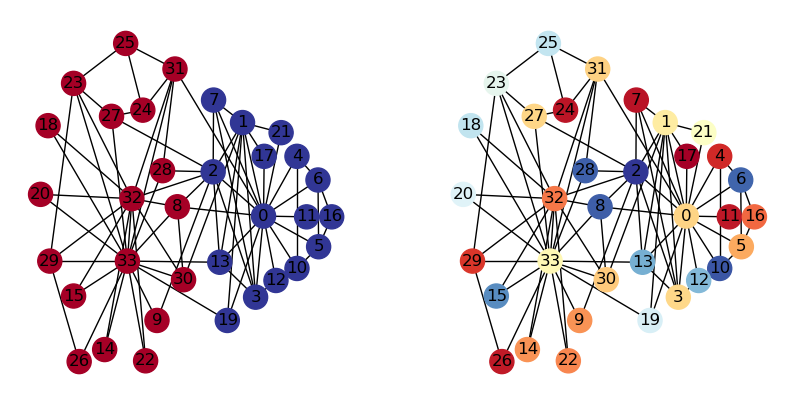

In [2]:
def plot_karate(G, pr=[], ax=None, cmap=plt.get_cmap('RdYlBu')): 
    fixed_positions = {0:(10.74,4.07),1:(9.76,6.48),2:(8.39,5.21),3:(10.37,1.98),4:(12.30,5.61),5:(13.31,3.28),6:(13.28,5.00),7:(8.41,7.06),8:(6.72,4.31),9:(5.77,1.38),10:(12.30,2.72),11:(12.75,4.05),12:(11.32,2.41),13:(8.70,2.88),14:(3.33,0.63),15:(1.88,2.01),16:(13.92,4.05),17:(10.77,5.61),18:(0.69,6.40),19:(9.05,1.38),20:(0.34,4.63),21:(11.56,6.22),22:(5.24,0.34),23:(1.88,7.49),24:(5.11,6.80),25:(4.31,8.52),26:(2.14,0.32),27:(3.65,6.64),28:(6.03,5.24),29:(0.77,2.91),30:(7.01,2.43),31:(6.61,7.86),32:(4.60,4.52),33:(4.39,2.91)}
    if len(pr) :
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax, cmap=cmap, node_color=pr)
    else : 
        nx.draw(G, with_labels=True, pos=fixed_positions, ax=ax)

G = nx.karate_club_graph()
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
magic_cut = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

plot_karate(G, magic_cut, ax=ax[0])
plot_karate(G, np.random.rand(G.order()), ax=ax[1])

## Exercise 1 - Theory 

We will first test ourselves on the theory of embeddings. Assume we have the (very simple) undirected line graph below. The graph is a line where node 1 is connected to node 2 and node 2 is connected to node 3. 

                                                   (1)-(2)-(3)

1. Assume you have embedded the above graph with a **Linear Embedding** using the Adjacency matrix of the graph as the similarity matrix. 

                                                    [0, 1, 0] 
                                                    [1, 0, 1] 
                                                    [0, 1, 0]

        How do you expect the embeddings to be if the embedding dimension is $d = 1$? Motivate your answer.
        Answer: One initial thought could be that (1) and (3) have similar embeddings. 


2. Compute the linear embedding with $d=1$, showing all the steps. _Hint:_ Remember how to optimize linear embeddings! 
                                        We use Eckart-Young theorem:
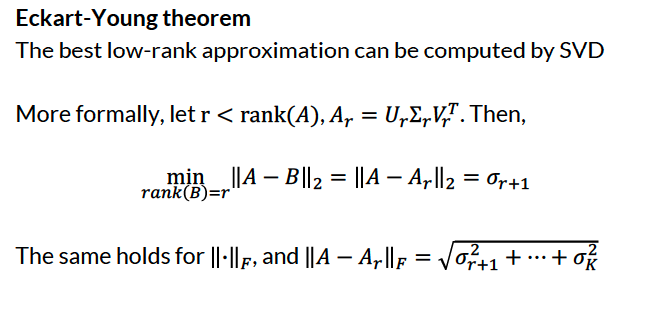
3. What happens to the linear embeddings with $d\in\{1,2,3\}$ if we create a star graph, where node 3 is the central node and all the others are connected to node 3, and node 0 is connected with node 1? For simplicity assume that the graph has $5$ nodes. 

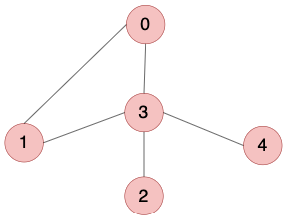


In [3]:
print('----------------------------------------------------------------------------------------------------')
print('Path Matrix A:')
A = np.array([[0, 1, 0], 
              [1, 0, 1], 
              [0, 1, 0]])
print(A)
print()
u, s, v = sp.linalg.svd(A)
print(f'u has shape: {u.shape}')
print(u)
print()
print(f's has shape: {s.shape} but its only the diagonal of we use np.diag(s) with shape: {np.diag(s).shape}')
print(np.diag(s))
print()
print(f'v has shape: {v.shape}')
print(v)
print()
print(f'We have that A = u@np.diag(s)@v')
print(u@np.diag(s)@v)
print()

d = 1
print(f'For d=1, using the Eckart-Young theorem, we only consider:\n- The 1st row of v.\n- The 1st column of np.diag(s).\n- The 1st row of s')
print()
print(f'1st row of u has shape: {u[:d,:].shape}')
print(u[:d,:])
print()
print(f'1st column of s has shape: {np.diag(s)[:,:d].shape}')
print(np.diag(s)[:,:d])
print()
print(f'1st row of v has shape: {u[:d,:].shape}')
print(v[:d,:])
print()
print(f'For d=1, we approximate A = u[:d,:]@np.diag(s)[:,:d]@v[:d,:]')
print(u[0:d,:]@np.diag(s)[:,0:d]@v[0:d,:])
print()





print('----------------------------------------------------------------------------------------------------')
print('Path Matrix A:')
A = np.array([[0, 1, 1, 0, 0], 
              [1, 0, 1, 0, 0], 
              [1, 1, 0, 1, 1], 
              [0, 0, 1, 0, 0], 
              [0, 0, 1, 0, 0]])
print(A)
u, s, v = sp.linalg.svd(A)
print()
for d in [1,2,3,4,5]:
    print(f'For d={d}, we approximate A = u[:d,:]@np.diag(s)[:,:d]@v[:d,:]')
    print(u[:d,:]@np.diag(s)[:,:d]@v[:d,:])
    print()

----------------------------------------------------------------------------------------------------
Path Matrix A:
[[0 1 0]
 [1 0 1]
 [0 1 0]]

u has shape: (3, 3)
[[ 0.70710678  0.          0.70710678]
 [ 0.         -1.          0.        ]
 [ 0.70710678  0.         -0.70710678]]

s has shape: (3,) but its only the diagonal of we use np.diag(s) with shape: (3, 3)
[[ 1.41421356  0.          0.        ]
 [ 0.          1.41421356  0.        ]
 [ 0.          0.         -0.        ]]

v has shape: (3, 3)
[[ 0.          1.          0.        ]
 [-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]]

We have that A = u@np.diag(s)@v
[[0. 1. 0.]
 [1. 0. 1.]
 [0. 1. 0.]]

For d=1, using the Eckart-Young theorem, we only consider:
- The 1st row of v.
- The 1st column of np.diag(s).
- The 1st row of s

1st row of u has shape: (1, 3)
[[0.70710678 0.         0.70710678]]

1st column of s has shape: (3, 1)
[[1.41421356]
 [0.        ]
 [0.        ]]

1st row of v has shape: (1

## Exercise 2 - Similarity matrices
In this exercise, we will implement different similarity matrices.

For the following three node-similarity measures, implement the corresponding methods below.
 1. Adjacency similarity.
 1. 2-hop similarity ($A^2$).
 1. Come up with your own measure of node similarity. You could, e.g., take neighbor-overlap into account. 
 

In [4]:
def adjacency_similarity(G):
    """
        Input: A networkx graph with n nodes
        Output: A normlized adjacency matrix of size [n, n], where each row sum to 1
    """
    ### YOUR CODE HERE    
    A = np.array(nx.adjacency_matrix(G).todense())
    return A / A.sum(1, keepdims=True)
    ### YOUR CODE HERE    


def two_hub(G, k=2):
    """
        Input: A networkx graph with n nodes
        Output: A^2, where A is the adjacency matrix 
    """
    ### YOUR CODE HERE    
    A = np.array(nx.adjacency_matrix(G).todense())
    A = np.linalg.matrix_power(A, k)
    A = A - np.diag(A)
    return A / A.sum(1, keepdims=True)
    ### YOUR CODE HERE    


def my_similarity(G):
    """
        Input: A networkx graph with n nodes
        Output: A [n, n] matrix of pair-wise similarities
    """
    ### YOUR CODE HERE    
    #sigmoid = lambda z: np.exp(z) / (1+np.exp(z))
    
    A_ = np.array(nx.adjacency_matrix(G).todense())
    
    n = G.order()
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            if A_[i, j] == 0: continue
                
            common_neighbors = 0
            for k in range(n):
                if k in [i, j]: continue
                if A_[i, k] + A_[j, k] == 2:
                    common_neighbors += 1
            A[i, j] = 1+np.log(common_neighbors+1)#sigmoid(common_neighbors)
            #print(common_neighbors, sigmoid(common_neighbors))
            A[j, i] = A[i, j]
    return A / A.sum(1, keepdims=True)
    ### YOUR CODE HERE    

# Check for normalization
# fns = [adjacency_similarity, adjacency_similarity1, two_hub, my_similarity]
fns = [adjacency_similarity, two_hub, my_similarity]
for fn in fns: 
    assert np.allclose(fn(G)[0].sum(), 1)
    assert fn(G).sum() == G.order()

Plotting similarities for Node 2


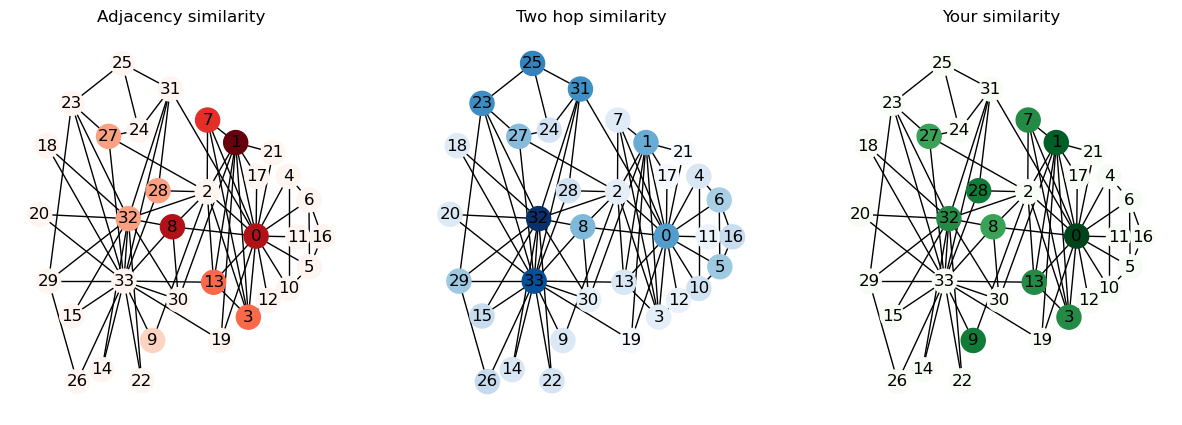

In [5]:
S1 = adjacency_similarity(G)
S2 = two_hub(G)
S3 = my_similarity(G)

# Plot similaritites
i = 2
print("Plotting similarities for Node %d" % i)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_title("Adjacency similarity")
plot_karate(G, S1[i,:], ax=ax[0], cmap=plt.get_cmap('Reds'))
ax[1].set_title("Two hop similarity")
plot_karate(G, S2[i,:], ax=ax[1], cmap=plt.get_cmap('Blues'))
ax[2].set_title("Your similarity")
plot_karate(G, S3[i,:], ax=ax[2], cmap=plt.get_cmap('Greens'))

## Exercise 3 - Linear embeddings

This exercise is about Linear embeddings and how to perform dimensionality reduction on the similarity matrices above.

Linear embeddings typically perform some linear dimensionality reduction on, variations of the Adjacency matrix $A\in \{0,1\}^{n \times n}$ for an **undirected graph** $G = (V,E)$. 

A linear embedding finds a matrix $Z \in \mathbb{R}^{n\times d}$ which contains a $d$-dimensional representation of a given node in the network. The methods minimize a "reconstruction error" of the embedding with respect to the adjacecy matrix

$$
\mathcal{L}(A,Z) = \sum_{(i,j) \in E}(Z_{i}^\top Z_{j} - A_{i,j})^2 = \|ZZ^\top - A\|_F^2
$$

1. Show that if instead of one matrix Z we have two $B \in \mathbb{R}^{n\times d}$ and $C \in \mathbb{R}^{n\times d}$, the best solution to the above minimization can be obtained by SVD on $A$
2. What is the gradient matrix of the above function for a single row $Z_{i\cdot}$ of the matrix $Z$?
3. Implement the linear embedding above using gradient descent on the three different similaririty matrices from Exercise 1.


**1. Solution**: 
We note that this is a low-rank approximation problem, which means that we can use the [Eckart-Young theorem](https://en.wikipedia.org/wiki/Low-rank_approximation#Proof_of_Eckart.E2.80.93Young.E2.80.93Mirsky_theorem_.28for_Frobenius_norm.29).
The theorem states that if we wish to find a rank $k$ matrix $B_k$ such that $||A - B_k||_F^2$ is minimized, then the best you can do is to 
let $B_k = U_k \Sigma_k V_k^T$ where $A = U\Sigma V^T$ is the SVD of A and $U_k$ is the first $k$ columns of $U$, similarly for $\Sigma$ and $V$.

By the Eckart-Young theorem, the above objective is equivalent to computing the $\text{SVD}(A) = U\Sigma V^\top$ and take   
$B = U_d\Sigma^{1/2}_d$ and $C = V_d\Sigma^{1/2}_d$.

**2. Solution**: 
For a single row the gradient is 

$$
\begin{aligned}
\frac{\partial \mathcal{L}(A, Z)}{\partial z_{i}} &=\sum_{j} \frac{\partial}{\partial z_{i}}\left(z_{i}^{\top} z_{j}-A_{i j}\right)^{2} \\
&=2 \sum_{j}\left(z_{i}^{\top} z_{j}-A_{i j}\right) z_{j}
\end{aligned}
$$


In [6]:
np.random.seed(0)

Iteration [1000/1000] X loss:    10.7756
Iteration [1000/1000] X loss:     1.2672
Iteration [1000/1000] X loss:    10.7569


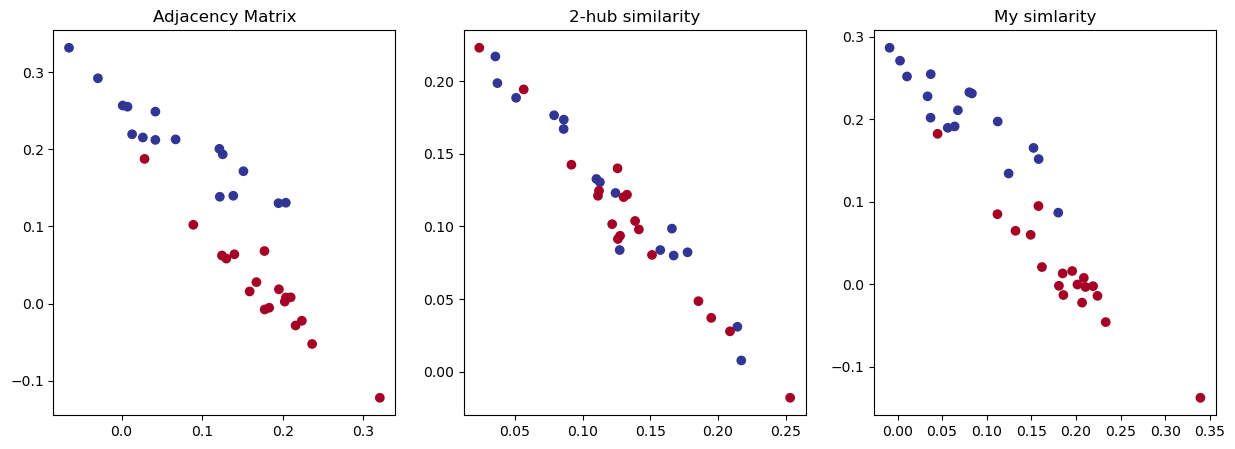

In [7]:

def lin_grads(A, Z): 
    ### YOUR CODE HERE    
    return 2 * (Z@Z.T - A) @ Z
    ### YOUR CODE HERE    

def lin_loss(A, Z): 
    return np.sum((Z@Z.T - A)**2)
    
def learn(A, dim, grad = lin_grads, loss = lin_loss, step_size=0.001, steps=1000):
    n, _ = A.shape
    np.random.seed(0)
    Z = np.random.rand(n, dim)
    i = 0
    ### YOUR CODE HERE    
    while i < steps: 
        prev_Z = Z #Store current x value in prev_x
        Z = Z - step_size * grad(A, prev_Z)   #Grad descent
        l = loss(A,Z)
        i+=1
        if i % 1000 == 0 : 
            print("\rIteration [%4d/%4d] X loss: %10.4f" % (i, steps, l), end="") #Print iterations        
    ### END CODE
    print()
    return Z

# Project the graph in 2D and plot it as points in the space
Z1 = learn(S1, 2)
Z2 = learn(S2, 2)
Z3 = learn(S3, 2)

# As colors to see what happens we can use the communities 
# that have been found with the "magic method" in the beginning.
# A good embedding method should be able to separate the two colors! 
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (Z, T) in enumerate(zip([Z1, Z2, Z3], ["Adjacency Matrix", "2-hub similarity", "My simlarity"])): 
    ax[i].set_title(T)
    ax[i].scatter(*(Z.T), c=magic_cut, cmap=plt.get_cmap('RdYlBu'))
plt.show()    


## Exercise 4 - VERSE

In this exercise, we will try to implement and run one network embedding introduced in the lecture, called [VERSE](https://arxiv.org/pdf/1803.04742.pdf).

VERSE is a simple *autoencoder* which takes in input a graph $G=(V,E)$, a row-normalized similarity matrix $S$ and learns an embedding matrix $Z \in \mathbb{R}^{n\times d}$ using the following cross-entropy loss between the rows in $S$ and the rows in $ZZ^\top$.

VERSE loss function for each node $i$ is 
$$
\mathcal{L}(S_i,Z) = -S_i \log(\text{softmax}(Z_iZ^\top)) 
$$
$$
\log(\text{softmax}(Z_iZ^\top))  = [\log\frac{e^{Z_iZ_0^\top}}{\sum_je^{Z_iZ_j^\top}},\log\frac{e^{Z_iZ_1^\top}}{\sum_je^{Z_iZ_j^\top}},...,\log\frac{e^{Z_iZ_{n-1}^\top}}{\sum_je^{Z_iZ_j^\top}}]
$$
$$
\mathcal{L}(S_i,Z)=-S_i\log(\text{softmax}(Z_iZ^\top))   = -({S_i}_0\log\frac{e^{Z_iZ_0^\top}}{\sum_je^{Z_iZ_j^\top}}+{S_i}_1\log\frac{e^{Z_iZ_1^\top}}{\sum_je^{Z_iZ_j^\top}}+...+{S_i}_{n-1}\log\frac{e^{Z_iZ_{n-1}^\top}}{\sum_je^{Z_iZ_j^\top}})
$$

which can be written in terms of the global loss
$$
\mathcal{L}(S,Z) = \sum_{i \in V}\mathcal{L}(S_i,Z)
$$
here $\text{softmax}(\cdot)$ is the [softmax](https://en.wikipedia.org/wiki/Softmax_function) function. 

The similarity matrix in case of VERSE is typically the Personalized PageRank (PPR) matrix. For the scope of the exercise we will use the the PageRank algorithm with $\alpha = 0.85$.



We will implement the full VERSE method and understand how it works in practice 
1. Compute the PageRank algorithm with $\alpha = 0.85$. 
2. Implement the VERSE Loss function
3. Compute the gradient of the loss function. **Hint: do it row-wise (i.e., node-by-node)**
4. Try to change the parameters and use another similarity function. What other similarity function among nodes can you use? 

**Solution**: 
We know that $\mathcal{L}(S, Z) = - \sum_{i\in V} S_i \cdot \log (softmax(Z_i Z^\top))$. The derivative we need to find equals:

$$
\begin{align}
                \frac{\partial \mathcal{L}(S, Z)}{\partial Z} &= [\frac{\partial \mathcal{L}(S_0, Z)}{\partial Z_0}, \frac{\partial \mathcal{L}(S_1, Z)}{\partial Z_1}, \frac{\partial \mathcal{L}(S_2, Z)}{\partial Z_2},...,\frac{\partial \mathcal{L}(S_{n-1}, Z)}{\partial Z_{n-1}} ]
\end{align}
$$  

Thus it suffices to examine the derivative $\frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i}$. 

Using the chain rule, $\frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i} = \frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i Z^\top} \frac{\partial Z_i Z^\top}{\partial Z_i}$. Let $softmax(Z_i Z^\top) = \sigma(Z_i Z^\top)=\frac{e^{Z_i Z^\top}}{\sum_j e^{Z_j Z^\top}}$.




- $ \frac{\partial \sigma(Z_i Z^\top)}{\partial Z_iZ^\top}=\frac{\partial\frac{e^{Z_i Z^\top}}{\sum_j e^{Z_j Z^\top}}}{\partial Z_iZ^\top}=\frac{e^{Z_i Z^\top}(\sum_j e^{Z_j Z^\top})-e^{Z_i Z^\top}e^{Z_i Z^\top}}{(\sum_j e^{Z_j Z^\top})^2} = \sigma(Z_i Z^\top)-\sigma(Z_i Z^\top)^2=\sigma(Z_i Z^\top)(1-\sigma(Z_i Z^\top))$

- $\frac{\partial log(\sigma(Z_i Z^\top))}{\partial Z_iZ^\top} = \frac{1}{\sigma(Z_i Z^\top)}\frac{\partial \sigma(Z_i Z^\top)}{\partial Z_iZ^\top}=\frac{1}{\sigma(Z_i Z^\top)}\sigma(Z_i Z^\top)(1-\sigma(Z_i Z^\top))=1-\sigma(Z_i Z^\top)$

- $\frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i Z^\top}=\frac{\partial \big(-S_ilog(\sigma(Z_i Z^\top))\big)}{\partial Z_iZ^\top}=-S_i\frac{\partial log(\sigma(Z_i Z^\top))}{\partial Z_iZ^\top}=-S_i(1-\sigma(Z_i Z^\top))$

- $\frac{\partial Z_i Z^\top}{\partial Z_i} = Z$

- $\frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i} = \frac{\partial \mathcal{L}(S_i, Z)}{\partial Z_i Z^\top} \frac{\partial Z_i Z^\top}{\partial Z_i}=-S_i(1-\sigma(Z_i Z^\top))Z$






In [8]:
from scipy.special import softmax

def pagerank_matrix(G, alpha = 0.85) :     
    ### YOUR CODE HERE
    n = G.number_of_nodes()
    A = nx.adjacency_matrix(G).todense()
    W = np.array(A/A.sum(axis=1)) # D^{-1}A
    # W = W.T # Fix.
     
    I = np.eye(n)
    
    P = ((1-alpha)*I)@np.linalg.inv(I - alpha*W)
    return P
    ### YOUR CODE HERE

G = nx.karate_club_graph()
P = pagerank_matrix(G)

# Sanity checks on the matrix
n = G.number_of_nodes()
per = np.zeros(n)
per[2] = 1

#assert np.allclose(my_pagerank(G,r=per), P[2,:], atol=1e-3, rtol=1e-3), "%s\n%s" % (str(my_pagerank(G, r=per)), str(P[2]))
#assert np.allclose(P[1,:].sum(), 1.)
# End sanity check.

print(pagerank_matrix(G))
print(nx.pagerank(G, personalization={i: 1 if i == 0 else 0 for i in range(n)}))


[[0.25868941 0.11034715 0.09531145 ... 0.04972392 0.03547823 0.03920369]
 [0.07619208 0.23115122 0.08481626 ... 0.02716223 0.02859784 0.03220713]
 [0.07488757 0.09651505 0.22410804 ... 0.04077355 0.04623776 0.04595078]
 ...
 [0.02486196 0.0196692  0.02594681 ... 0.21799371 0.05223207 0.04949676]
 [0.03209935 0.03747303 0.05324348 ... 0.09451517 0.25092308 0.10129603]
 [0.04480422 0.05330836 0.06683749 ... 0.11313545 0.12795288 0.26427721]]
{0: 0.2586814904840389, 1: 0.07618884833001639, 2: 0.07488591193830409, 3: 0.048920593377997826, 4: 0.03050072647529325, 5: 0.04621087522084753, 6: 0.043409925083705274, 7: 0.03404846944645621, 8: 0.028522268799148143, 9: 0.003516039991625176, 10: 0.028608810402927558, 11: 0.015705506760724006, 12: 0.012165474883403053, 13: 0.041968624699790465, 14: 0.003741810281140182, 15: 0.005328984539894554, 16: 0.016931346556320285, 17: 0.012703428518314824, 18: 0.0023053862662163085, 19: 0.01573010632552416, 20: 0.002948223151762995, 21: 0.014936519196146974, 

In [ ]:
def verse_loss(S, Z): 
    loss = 0
    ### YOUR CODE HERE
    slow = True
    if slow: 
        for i in np.arange(Z.shape[0]) :
            loss -= np.dot(S[i,:],np.log(softmax(Z[i,:]@Z.T)))# Row-wise cross-entropy
    else:
        loss = -(S * np.log(softmax(Z@Z.T, axis=1))).sum()
    ### YOUR CODE HERE
    return loss
verse_loss(.5 *np.ones((2,2)),np.array([[1,2],[3,4]])) 

def verse_grads(S, Z): 
    grads = np.zeros(Z.shape)
    ### YOUR CODE HERE 
    slow = False
    if slow: 
        scores = np.zeros(S.shape)
        for i in np.arange(Z.shape[0]) : 
            scores[i,:] = softmax(Z[i,:]@Z.T) #Row-wise loss 
        grads = (np.dot(scores, S)-S) @ Z
    else: # fast
        scores = softmax(Z @ Z.T, axis=1)
        grads = (np.dot(scores, S)- S) @ Z 
    ### YOUR CODE HERE 
    return grads


print(P)

# Slow vs. Fast on my machine is a factor 10.
Z1 = learn(P, 2, grad=verse_grads, loss=verse_loss, step_size = 0.005, steps=4000)
Z2 = learn(S3, 2, grad=verse_grads, loss=verse_loss, step_size = 0.005, steps=4000)

fig, ax = plt.subplots(1, 2)
ax[0].scatter(np.array(Z1[:,0]), np.array(Z1[:,1]), c=magic_cut)
ax[0].set_title("Page Rank")
ax[1].scatter(np.array(Z2[:,0]), np.array(Z2[:,1]), c=magic_cut)
ax[1].set_title("My similarity")
plt.show()

[[0.25868941 0.11034715 0.09531145 ... 0.04972392 0.03547823 0.03920369]
 [0.07619208 0.23115122 0.08481626 ... 0.02716223 0.02859784 0.03220713]
 [0.07488757 0.09651505 0.22410804 ... 0.04077355 0.04623776 0.04595078]
 ...
 [0.02486196 0.0196692  0.02594681 ... 0.21799371 0.05223207 0.04949676]
 [0.03209935 0.03747303 0.05324348 ... 0.09451517 0.25092308 0.10129603]
 [0.04480422 0.05330836 0.06683749 ... 0.11313545 0.12795288 0.26427721]]
